# Researching the data set

In [1]:
# Importing possible needed libraries


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate


In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [4]:
df["id"].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [5]:
df.loc[(df["id"] == 795000620) | (df["id"] == 2019200220)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12942,2019200220,9/23/2014,160000.0,3,2.25,1470,8682,1.0,NO,NONE,...,7 Average,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359
12943,2019200220,2/26/2015,269000.0,3,2.25,1470,8682,1.0,NO,NONE,...,7 Average,1160,310.0,1985,NaN,98003,47.2729,-122.299,1670,8359
17588,795000620,9/24/2014,115000.0,3,1.00,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.330,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.00,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.330,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250


In [6]:
df.duplicated(subset=('id')).value_counts()

False    21420
True       177
dtype: int64

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [11]:
df_copy = df.copy()

In [12]:
df_copy['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [13]:
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
283.0         1
2390.0        1
506.0         1
1275.0        1
295.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [15]:
df_copy["id"].value_counts(ascending = False)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [16]:
df_copy['date'].value_counts(ascending = False)

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/2/2014       1
5/27/2015       1
3/8/2015        1
7/27/2014       1
11/30/2014      1
Name: date, Length: 372, dtype: int64

In [17]:
df_copy['price'].value_counts(ascending = False)

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [18]:
df_copy['bedrooms'].value_counts(ascending = False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
df_copy['bathrooms'].value_counts(ascending = False)

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [20]:
df_copy['sqft_living'].value_counts(ascending = False)

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [21]:
df_copy['sqft_lot'].value_counts(ascending = False)

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [22]:
df_copy['floors'].value_counts(ascending = False)

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [23]:
df_copy['waterfront'].value_counts(ascending = False)

NO     19075
YES      146
Name: waterfront, dtype: int64

In [24]:
df_copy['condition'].value_counts(ascending = False)

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [25]:
df_copy['grade'].value_counts(ascending = False)

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [26]:
df_copy['sqft_above'].value_counts(ascending = False)

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [27]:
df_copy['sqft_basement'].value_counts(ascending = False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
283.0         1
2390.0        1
506.0         1
1275.0        1
295.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [28]:
df_copy['yr_built'].value_counts(ascending = False)

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [29]:
df_copy['yr_renovated'].value_counts(ascending = False)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [30]:
df_copy['zipcode'].value_counts(ascending = False)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df_copy['lat'].value_counts(ascending = False)

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [32]:
df_copy['long'].value_counts(ascending = False)

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [33]:
df_copy['sqft_living15'].value_counts(ascending = False)

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [34]:
df_copy['sqft_lot15'].value_counts(ascending = False)

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

In [35]:
df_copy = df.copy()

In [36]:
df_copy['view'] = df_copy['view'].fillna(value="NONE")

df_copy['waterfront'] = df_copy['waterfront'].fillna(value="N/A")

df_copy['yr_renovated'] = df_copy['yr_renovated'].fillna(value= 0.0)

df_copy['sqft_basement'] = df_copy['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))

df_copy['sqft_basement'] = df_copy['sqft_basement'].astype("float64")


In [37]:
df_copy["grade"] = df_copy["grade"].str.split(" ").str[0].astype('int64')

In [38]:
df_copy["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [39]:
df_copy["yr_built"] = pd.to_datetime(df_copy["yr_built"], format = '%Y')

In [40]:
df_copy["yr_built"] = pd.DatetimeIndex(df_copy['yr_built']).year

In [41]:
df_copy["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [42]:
df_copy["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [43]:
df_copy['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [45]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [46]:
df["yr_renovated"].isna().sum()

3842

In [47]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [48]:
df.loc[df["view"].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,5/28/2014,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,...,11 Excellent,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
20148,291310170,8/4/2014,384500.0,3,2.50,1600,2610,2.0,NO,NaN,...,8 Good,1600,0.0,2005,NaN,98027,47.5344,-122.068,1445,1288
20380,1196003740,9/24/2014,734000.0,5,4.25,4110,42755,2.0,NO,NaN,...,10 Very Good,2970,1140.0,2000,NaN,98023,47.3375,-122.337,2730,12750
21057,3448900290,8/28/2014,636230.0,4,2.50,2840,6284,2.0,NO,NaN,...,9 Better,2840,0.0,2013,0.0,98056,47.5135,-122.169,2790,7168


In [49]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


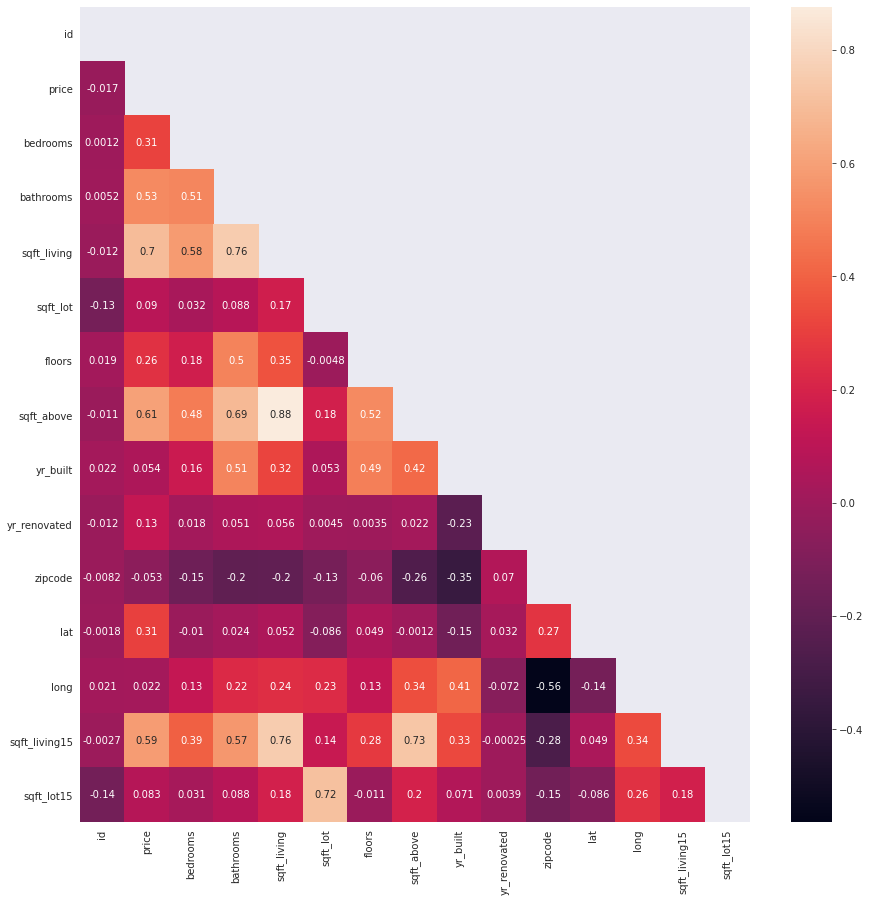

In [50]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.zeros_like(df.corr(), dtype = bool)
    
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(df.corr(), annot=True, mask=mask);

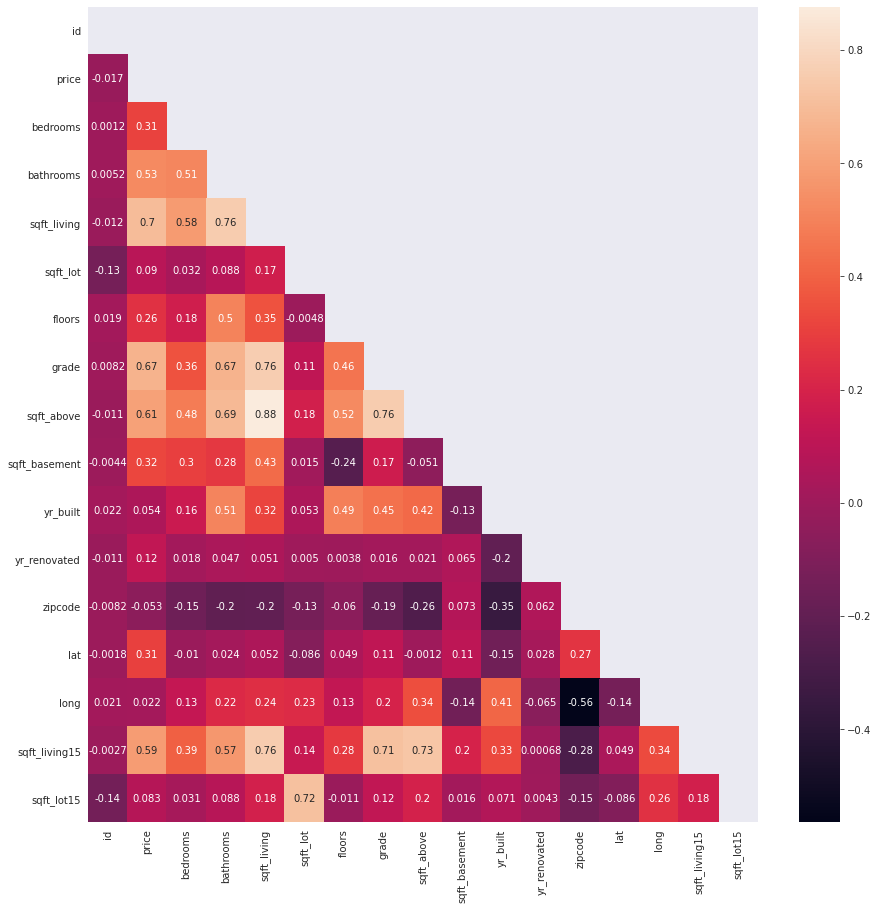

In [51]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.zeros_like(df_copy.corr(), dtype = bool)
    
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(df_copy.corr(), annot=True, mask=mask);

In [52]:
df_copy_corr = df_copy.corr()["price"].map(abs).sort_values(ascending = False)
df_copy_corr

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [53]:
house_preds = df_copy[["sqft_living","grade"]]
house_target =  df_copy["price"]

In [54]:
lr = LinearRegression()
lr.fit(house_preds,house_target)

LinearRegression()

In [55]:
lr.score(house_preds,house_target)

0.534698840029157

In [56]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 3)
ss = StandardScaler()
ss.fit(df_copy.drop(['price',"date","waterfront", "view", 
                     "condition", "sqft_basement", "yr_renovated"], axis =1))

df_copy_scaled = ss.transform(df_copy.drop(['price', "date", "waterfront", 
                                            "view", "condition", "sqft_basement", 
                                            "yr_renovated"], axis = 1))

In [57]:
select.fit(X=df_copy_scaled, y = df_copy["price"])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [58]:
select.support_

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False])

In [59]:
df_copy.drop(['price',"date","waterfront", "view", 
                     "condition", "sqft_basement", "yr_renovated"], axis =1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,8,1530,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,8,2310,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,7,1020,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,3,2.50,1600,2388,2.0,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [60]:
house_preds = df_copy[["sqft_living","grade", 'yr_built']]
house_target =  df_copy["price"]
lr = LinearRegression()
lr.fit(house_preds,house_target)
lr.score(house_preds,house_target)

0.603540986693332

In [61]:
select.ranking_

array([11,  3,  4,  1, 10,  8,  1, 12,  1,  6,  2,  5,  7,  9])

In [62]:
endog = df_copy["price"]
exog = sm.add_constant(df_copy[["grade", "sqft_living"]])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
grade        9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
endog = df_copy["price"]
exog = sm.add_constant(df_copy["grade"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
endog = df["price"]
exog = sm.add_constant(df["sqft_living"])
lin_reg_model = sm.OLS(endog, exog)

In [65]:
lin_reg_model.fit()

In [66]:
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
endog = df["price"]
exog = sm.add_constant(df["sqft_living15"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
endog = df["price"]
exog = sm.add_constant(df["bathrooms"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
endog = df["price"]
exog = sm.add_constant(df["bedrooms"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
endog = df["price"]
exog = sm.add_constant(df["sqft_above"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:18:17   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [72]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [73]:
df_copy  = df_copy.drop_duplicates(subset= ["id"], keep = "last")

In [74]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [75]:
X = df_copy.drop(["price","date","waterfront", "view",
                  "condition", "sqft_basement", "yr_renovated"], axis = 1)
y = df_copy.price

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [76]:
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

214721.72211652595
214721.72211652604


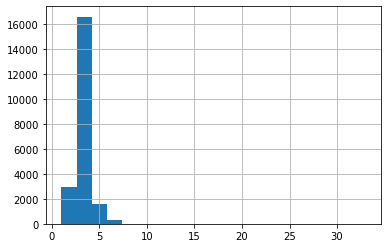

In [77]:
df_copy["bedrooms"].hist(bins=20);

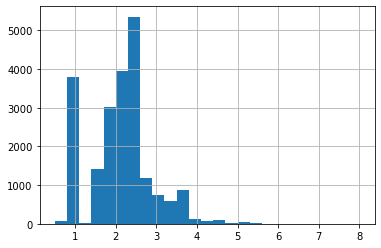

In [78]:
df_copy["bathrooms"].hist(bins=25);

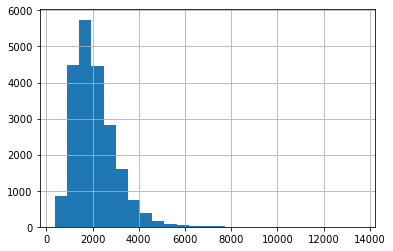

In [79]:
df_copy["sqft_living"].hist(bins=25);

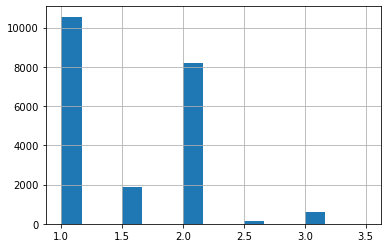

In [80]:
df_copy["floors"].hist(bins=15);

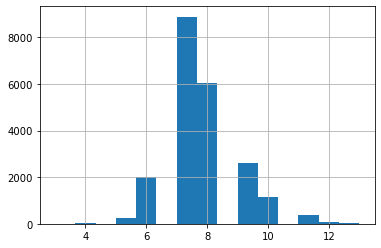

In [81]:
df_copy["grade"].hist(bins=15);

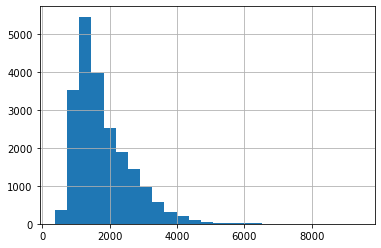

In [82]:
df_copy["sqft_above"].hist(bins=25);

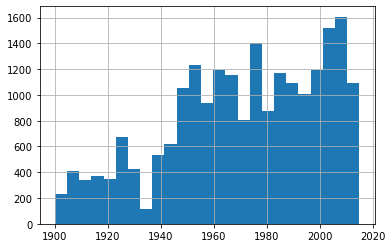

In [83]:
df_copy["yr_built"].hist(bins=25);

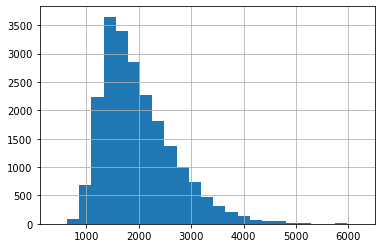

In [84]:
df_copy["sqft_living15"].hist(bins=25);

In [85]:
df_copy["bedrooms*bathrooms"] = df_copy["bedrooms"]*df_copy["bathrooms"]
df_copy.corr()["price"]["bedrooms*bathrooms"]

0.5168818569430691

In [86]:
pf = PolynomialFeatures(degree = 3)

X = df_copy.drop(['price',"date","waterfront", "view", 
                  "condition", "sqft_basement", "yr_renovated"], axis =1)
y  = df_copy["price"]

pf.fit(X)

PolynomialFeatures(degree=3)

In [87]:
pdf = pd.DataFrame(pf.transform(X), columns = pf.get_feature_names())
pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x12^3,x12^2 x13,x12^2 x14,x12 x13^2,x12 x13 x14,x12 x14^2,x13^3,x13^2 x14,x13 x14^2,x14^3
0,1.0,7.129301e+09,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,...,2.406104e+09,1.014514e+10,5386800.0,4.277615e+10,22713000.0,12060.000,1.803621e+11,9.576750e+07,50850.0000,27.000000
1,1.0,6.414100e+09,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,...,4.826809e+09,2.181775e+10,19278675.0,9.861880e+10,87141892.5,77000.625,4.457687e+11,3.938917e+08,348051.9375,307.546875
2,1.0,5.631500e+09,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,...,2.012365e+10,5.964590e+10,14796800.0,1.767887e+11,43857280.0,10880.000,5.239965e+11,1.299917e+08,32248.0000,8.000000
3,1.0,2.487201e+09,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,...,2.515456e+09,9.248000e+09,22195200.0,3.400000e+10,81600000.0,195840.000,1.250000e+11,3.000000e+08,720000.0000,1728.000000
4,1.0,1.954401e+09,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,...,5.832000e+09,2.430972e+10,19440000.0,1.013310e+11,81032400.0,64800.000,4.223815e+11,3.377701e+08,270108.0000,216.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,1.0,2.630000e+08,3.0,2.50,1530.0,1131.0,3.0,8.0,1530.0,2009.0,...,3.581577e+09,3.532418e+09,17556750.0,3.483934e+09,17315775.0,86062.500,3.436115e+09,1.707811e+07,84881.2500,421.875000
21416,1.0,6.600060e+09,4.0,2.50,2310.0,5813.0,2.0,8.0,2310.0,2014.0,...,6.128487e+09,2.411208e+10,33489000.0,9.486720e+10,131760000.0,183000.000,3.732480e+11,5.184000e+08,720000.0000,1000.000000
21417,1.0,1.523300e+09,2.0,0.75,1020.0,1350.0,2.0,7.0,1020.0,2009.0,...,1.061208e+09,2.088083e+09,1560600.0,4.108610e+09,3070710.0,2295.000,8.084294e+09,6.042074e+06,4515.7500,3.375000
21418,1.0,2.913101e+08,3.0,2.50,1600.0,2388.0,2.0,8.0,1600.0,2004.0,...,2.803221e+09,2.558685e+09,14910750.0,2.335480e+09,13610025.0,79312.500,2.131747e+09,1.242277e+07,72393.7500,421.875000


In [88]:
pdf.shape

(21420, 816)

In [89]:
lr = LinearRegression()
lr.fit(pdf, y)
lr.score(pdf, y)

0.6224951439578452

In [90]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21420 non-null  int64  
 1   date                21420 non-null  object 
 2   price               21420 non-null  float64
 3   bedrooms            21420 non-null  int64  
 4   bathrooms           21420 non-null  float64
 5   sqft_living         21420 non-null  int64  
 6   sqft_lot            21420 non-null  int64  
 7   floors              21420 non-null  float64
 8   waterfront          21420 non-null  object 
 9   view                21420 non-null  object 
 10  condition           21420 non-null  object 
 11  grade               21420 non-null  int64  
 12  sqft_above          21420 non-null  int64  
 13  sqft_basement       21420 non-null  float64
 14  yr_built            21420 non-null  int64  
 15  yr_renovated        21420 non-null  float64
 16  zipc

In [91]:
df_copy_encoder = df_copy.drop(["date","waterfront","view"], axis = 1)

In [92]:
df_copy_encoder

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms*bathrooms
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,6.75
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12.00
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,Average,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,7.50
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,Average,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,10.00
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,Average,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1.50
21595,291310100,400000.0,3,2.50,1600,2388,2.0,Average,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,7.50


In [93]:
df_copy_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21420 non-null  int64  
 1   price               21420 non-null  float64
 2   bedrooms            21420 non-null  int64  
 3   bathrooms           21420 non-null  float64
 4   sqft_living         21420 non-null  int64  
 5   sqft_lot            21420 non-null  int64  
 6   floors              21420 non-null  float64
 7   condition           21420 non-null  object 
 8   grade               21420 non-null  int64  
 9   sqft_above          21420 non-null  int64  
 10  sqft_basement       21420 non-null  float64
 11  yr_built            21420 non-null  int64  
 12  yr_renovated        21420 non-null  float64
 13  zipcode             21420 non-null  int64  
 14  lat                 21420 non-null  float64
 15  long                21420 non-null  float64
 16  sqft

In [94]:
ohe = OneHotEncoder().fit(df_copy_encoder)

copy_data_transform = ohe.fit_transform(df_copy_encoder.drop(["price","bedrooms", "bathrooms", 
                                                              "id","zipcode", "sqft_living", 
                                                             "sqft_lot", "floors", "grade", 
                                                             "sqft_above", "sqft_basement", 
                                                             "yr_built", "yr_renovated", "lat", 
                                                             "long", "sqft_living15", "sqft_lot15", 
                                                             "bedrooms*bathrooms"], axis = 1))

In [95]:
copy_data_transform.todense()

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [96]:
ohe.get_feature_names()

array(['x0_Average', 'x0_Fair', 'x0_Good', 'x0_Poor', 'x0_Very Good'],
      dtype=object)

In [97]:
copy_data_transform_df = pd.DataFrame(copy_data_transform.todense(), columns=ohe.get_feature_names())
copy_data_transform_df

,x0_Average,x0_Fair,x0_Good,x0_Poor,x0_Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21415,1.0,0.0,0.0,0.0,0.0
21416,1.0,0.0,0.0,0.0,0.0
21417,1.0,0.0,0.0,0.0,0.0
21418,1.0,0.0,0.0,0.0,0.0


In [98]:
lr = LinearRegression()
lr.fit(copy_data_transform_df, y)
lr.score(copy_data_transform_df,y)

0.006473869065140581

In [99]:
print("Mean squared error: %.2f" % np.mean((lr.predict(copy_data_transform) - y) ** 2))

Mean squared error: 134217228866.42


In [100]:
pd.get_dummies(df_copy.drop("price", axis =1))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,...,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,3,1.00,1180,5650,1.0,7,1180,0.0,1955,...,0,0,0,0,1,1,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,7,2170,400.0,1951,...,0,0,0,0,1,1,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,6,770,0.0,1933,...,0,0,0,0,1,1,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,7,1050,910.0,1965,...,0,0,0,0,1,0,0,0,0,1
4,1954400510,3,2.00,1680,8080,1.0,8,1680,0.0,1987,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,8,1530,0.0,2009,...,0,0,0,0,1,1,0,0,0,0
21593,6600060120,4,2.50,2310,5813,2.0,8,2310,0.0,2014,...,0,0,0,0,1,1,0,0,0,0
21594,1523300141,2,0.75,1020,1350,2.0,7,1020,0.0,2009,...,0,0,0,0,1,1,0,0,0,0
21595,291310100,3,2.50,1600,2388,2.0,8,1600,0.0,2004,...,0,0,0,0,1,1,0,0,0,0


In [101]:
house_preds = df_copy[["sqft_living","grade", 'yr_built']]
house_target =  df_copy["price"]
lr = LinearRegression()
lr.fit(house_preds,house_target)
lr.score(house_preds,house_target)

0.6029800133334281

In [102]:
y = df_copy.price
X = df_copy[["sqft_living", "grade", "yr_built"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .2,
                                                   random_state = 42)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6039340522705596

In [104]:
lr.coef_

array([   176.95877373, 145919.26916462,  -3737.77907678])

In [105]:
lr.score(X_test, y_test)

0.5981804504727954

In [106]:
poly_2 = PolynomialFeatures(3)

X_poly = pd.DataFrame(
                    poly_2.fit_transform(df_copy.drop(['price',"date","waterfront", "view", 
                                                      "condition", "sqft_basement", "yr_renovated"], axis = 1)))
y = df_copy.price
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,813,814,815
0,1.0,7.129301e+09,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,...,2.406104e+09,1.014514e+10,5386800.0,4.277615e+10,22713000.0,12060.000,1.803621e+11,9.576750e+07,50850.0000,27.000000
1,1.0,6.414100e+09,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,...,4.826809e+09,2.181775e+10,19278675.0,9.861880e+10,87141892.5,77000.625,4.457687e+11,3.938917e+08,348051.9375,307.546875
2,1.0,5.631500e+09,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,...,2.012365e+10,5.964590e+10,14796800.0,1.767887e+11,43857280.0,10880.000,5.239965e+11,1.299917e+08,32248.0000,8.000000
3,1.0,2.487201e+09,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,...,2.515456e+09,9.248000e+09,22195200.0,3.400000e+10,81600000.0,195840.000,1.250000e+11,3.000000e+08,720000.0000,1728.000000
4,1.0,1.954401e+09,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,...,5.832000e+09,2.430972e+10,19440000.0,1.013310e+11,81032400.0,64800.000,4.223815e+11,3.377701e+08,270108.0000,216.000000


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   test_size = 0.2,
                                                   random_state = 42)
lr_poly = LinearRegression()

lr_poly.fit(X_train, y_train)

lr_poly.score(X_train, y_train)

0.6272663161933765

In [108]:
lr_poly.score(X_test, y_test)

0.5851115465290172

In [109]:
y  = df_copy["price"]

X_train, X_test, y_train, y_test = train_test_split(pdf, y,
                                                   test_size = 0.2,
                                                   random_state = 42)
lr_poly = LinearRegression()

lr_poly.fit(X_train, y_train)

lr_poly.score(X_train, y_train)

0.6272663161933765

In [110]:
lr_poly.score(X_test, y_test)

0.5851115465290172

In [111]:
X_train

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x12^3,x12^2 x13,x12^2 x14,x12 x13^2,x12 x13 x14,x12 x14^2,x13^3,x13^2 x14,x13 x14^2,x14^3
13513,1.0,8.029550e+09,4.0,2.50,2240.0,4616.0,2.0,7.0,1840.0,2001.0,...,1.154318e+10,2.655952e+10,51076000.0,6.111040e+10,1.175200e+08,226000.0,1.406080e+11,2.704000e+08,520000.00,1000.000
13510,1.0,5.035301e+09,2.0,2.25,2470.0,7658.0,1.0,8.0,1480.0,1954.0,...,8.869743e+09,3.115122e+10,19282050.0,1.094055e+11,6.772005e+07,41917.5,3.842406e+11,2.378380e+08,147217.50,91.125
5673,1.0,1.526079e+09,5.0,3.50,3530.0,218472.0,2.0,7.0,2380.0,1999.0,...,9.393931e+09,9.411917e+11,77911750.0,9.429938e+13,7.806093e+09,646187.5,9.447994e+15,7.821039e+11,64742475.00,5359.375
15291,1.0,4.060000e+09,4.0,1.50,1580.0,10230.0,1.0,6.0,790.0,1945.0,...,1.442897e+09,8.880840e+09,7661400.0,5.466039e+10,4.715490e+07,40680.0,3.364274e+11,2.902322e+08,250380.00,216.000
17139,1.0,6.072400e+09,4.0,2.50,2070.0,10244.0,1.0,8.0,1370.0,1969.0,...,8.869743e+09,4.149069e+10,42849000.0,1.940842e+11,2.004381e+08,207000.0,9.078828e+11,9.376049e+08,968300.00,1000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,8.732190e+09,4.0,2.25,2490.0,7233.0,1.0,8.0,1460.0,1978.0,...,8.000000e+09,3.200000e+10,36000000.0,1.280000e+11,1.440000e+08,162000.0,5.120000e+11,5.760000e+08,648000.00,729.000
11964,1.0,5.288200e+09,2.0,1.75,2470.0,4600.0,1.0,7.0,1140.0,1916.0,...,5.735339e+09,1.658122e+10,11214350.0,4.793732e+10,3.242138e+07,21927.5,1.385897e+11,9.373219e+07,63393.75,42.875
5390,1.0,6.381501e+09,3.0,1.00,1260.0,6826.0,1.0,6.0,720.0,1944.0,...,2.197000e+09,1.153594e+10,5070000.0,6.057256e+10,2.662140e+07,11700.0,3.180525e+11,1.397828e+08,61434.00,27.000
860,1.0,3.330501e+09,2.0,1.00,1320.0,3090.0,1.0,7.0,1320.0,1908.0,...,2.048383e+09,6.645148e+09,3225800.0,2.155749e+10,1.046480e+07,5080.0,6.993453e+10,3.394880e+07,16480.00,8.000


In [112]:
model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])

train scores: [0.19883492 0.63721063 0.55491918 0.61859365 0.6283654 ],
      test scores: [-0.04293544  0.59776004  0.4682378   0.64741634  0.5909579 ]


(0.5275847562747249, 0.16690165448411906)

In [113]:
X = df_copy.drop(['id', 'price',"date","waterfront", "view", 
                  "condition", "sqft_basement", "yr_renovated"], axis =1)
y= df_copy.price

X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42
)

In [114]:
poly_3 = PolynomialFeatures(3)
X_poly3 = poly_3.fit_transform(X_train)

model_poly3 = LinearRegression()
scores_complex3 = cross_validate(
                                model_poly3, X_poly3, y_train, cv = 5, 
                                return_train_score = True)
print(f"""train scores: {scores_complex3["train_score"]},
    test scores: {scores_complex3['test_score']}""")

train scores: [0.83813324 0.83904904 0.76129795 0.81909558 0.83919879],
    test scores: [ 0.68530248  0.66341045 -3.12737885  0.59534603  0.19345695]


In [115]:
np.mean(scores_complex3['train_score']), np.std(scores_complex3['test_score']) 

(0.8193549197272926, 1.475543841854422)

In [117]:
np.mean(scores_complex3['test_score']), np.std(scores_complex3["test_score"])

(-0.19797258936980783, 1.475543841854422)